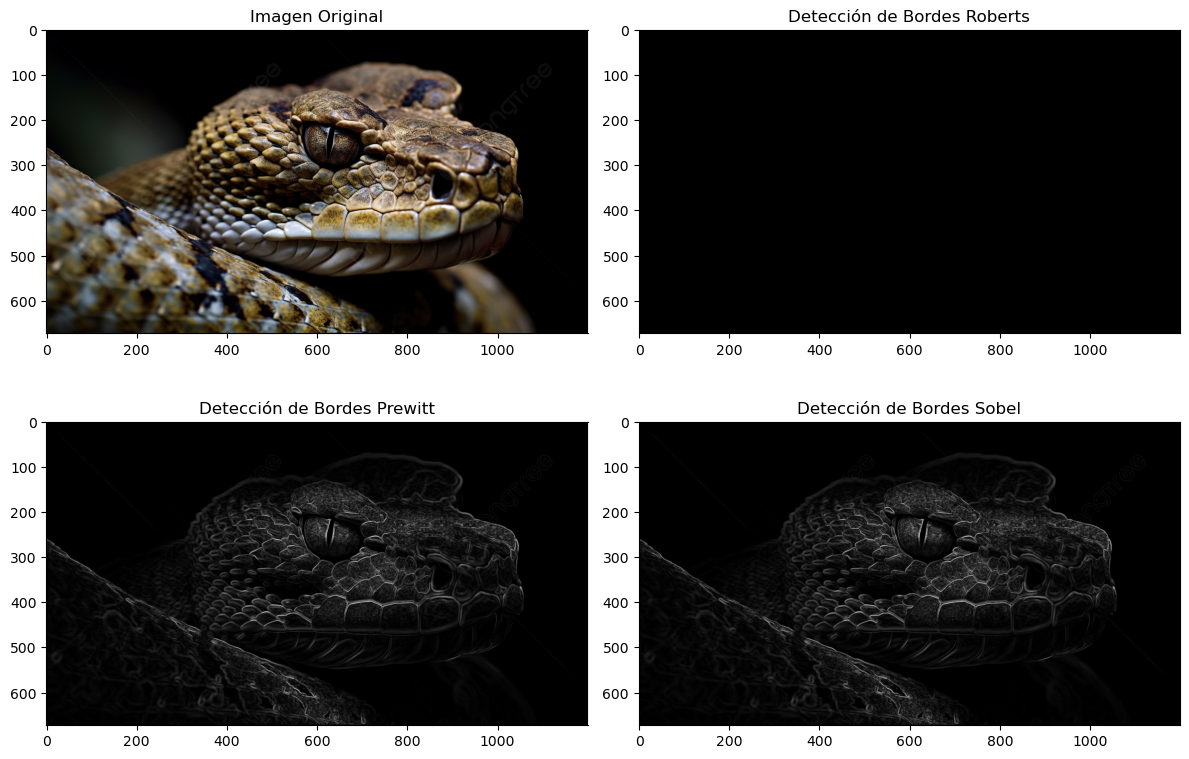

In [29]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

def convolucion(imagen, kernel):
    imagen_array = np.array(imagen)
    alto, ancho = imagen_array.shape
    k_alto, k_ancho = kernel.shape
    padding_alto = k_alto // 2
    padding_ancho = k_ancho // 2
    resultado = np.zeros((alto, ancho), dtype=np.float32)
    for y in range(padding_alto, alto - padding_alto):
        for x in range(padding_ancho, ancho - padding_ancho):
            region = imagen_array[y-padding_alto:y+padding_alto+1, x-padding_ancho:x+padding_ancho+1]
            if region.shape == kernel.shape:
                resultado[y, x] = np.sum(region * kernel)
    return resultado


def detector_bordes(imagen, tipo):
    imagen_gris = imagen.convert('L')
    imagen_np = np.array(imagen_gris, dtype=np.float32)
    
    if tipo == 'Roberts':
        mask_h = np.array([[1, 0], [0, -1]], dtype=np.float32)
        mask_v = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    elif tipo == 'Prewitt':
        mask_h = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
        mask_v = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
    elif tipo == 'Sobel':
        mask_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
        mask_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
    else:
        raise ValueError("Tipo de detector de bordes no válido")

    conv_h = convolucion(imagen_np, mask_h)
    conv_v = convolucion(imagen_np, mask_v)
    magnitud = np.sqrt(conv_h**2 + conv_v**2)
    
    magnitud_max = magnitud.max()
    if magnitud_max == 0:
        magnitud_norm = magnitud * 255
    else:
        magnitud_norm = (magnitud / magnitud_max) * 255
    
    magnitud_norm = magnitud_norm.astype(np.uint8)
    imagen_bordes = Image.fromarray(magnitud_norm)
    
    return imagen_bordes


imagen_original = Image.open('sepiente.png')


imagen_bordes_roberts = detector_bordes(imagen_original, 'Roberts')
imagen_bordes_prewitt = detector_bordes(imagen_original, 'Prewitt')
imagen_bordes_sobel = detector_bordes(imagen_original, 'Sobel')

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(imagen_bordes_roberts, cmap='gray')
plt.title('Detección de Bordes Roberts')

plt.subplot(2, 2, 3)
plt.imshow(imagen_bordes_prewitt, cmap='gray')
plt.title('Detección de Bordes Prewitt')

plt.subplot(2, 2, 4)
plt.imshow(imagen_bordes_sobel, cmap='gray')
plt.title('Detección de Bordes Sobel')

plt.tight_layout()
plt.show()

imagen_original.close()
